# Caso Practico: ((1)) Predecir el consumo de los vehículos

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Regresión Lineal
### Importación de CSV

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
fileDownloaded = drive.CreateFile({'id':'1QpgNN2qd8OVn8W8cfmTcCU6Vps_dOD8u'})

In [5]:
fileDownloaded.GetContentFile('csv_auto.csv')


In [6]:
import pandas as pd
df_auto = pd.read_csv('csv_auto.csv', delimiter=',' )

#df_auto.head()
df_auto.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [7]:
fileDownloaded = drive.CreateFile({'id':'1Wp_aeZjmNJG9D5G6ceutU81-MRXvXFso'})
fileDownloaded.GetContentFile('csv_crime_data.csv')

In [ ]:
#import pandas as pd
df_crimen = pd.read_csv('csv_crime_data.csv', delimiter=',' )

#df_crimen.head()
df_crimen.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Regresión lineal con de scikit-learn
En `scikit-learn` los modelos de regresión lineal se implementa con la clase `LinearRegression`. En el siguiente ejemplo se muestra los pasos necesarios para conseguir una regresión lineal.

In [8]:
#################################################
########## ARCHIVO AUTO.CSV #####################
#################################################



In [33]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
###from numpy import np

#### Conjunto de datos
#print(len(df_auto.columns))
print("====================x_train===============================")
x_train = df_auto.iloc[:, :(len(df_auto.columns)-1)]
print(x_train.shape)
x_train.info(verbose = False)
#print(x_train)

print("====================y_train===============================")
y_train = df_auto.iloc[:,-1]
print(y_train.shape)
y_train.head()
print(y_train)

x_train_ori = x_train
x_train = x_train.values

y_train_ori = y_train
y_train = y_train.values


ImportError: ignored

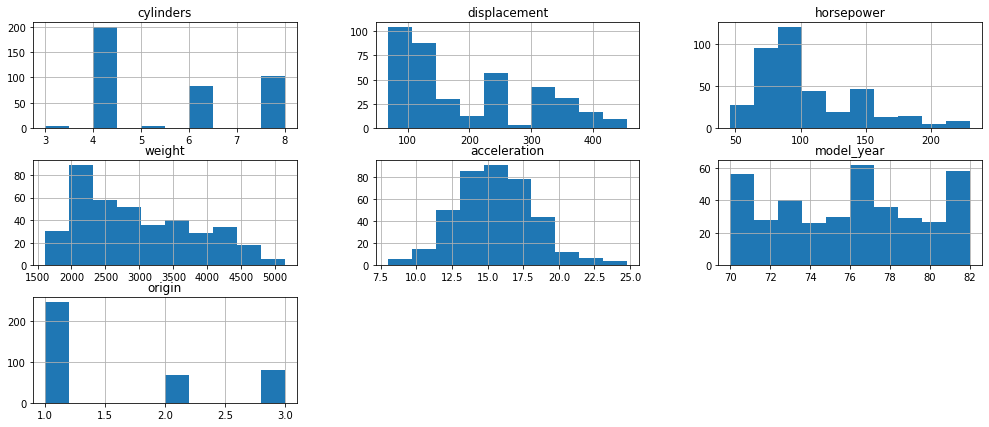

In [31]:
###################################################
###### Vision General de las Variables ############
###################################################

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [17, 7]

#Nos muestra entre qué valores se concentran la mayoría de registros
x_train_ori.hist()
plt.show()

In [32]:
#######################################################
############# Funciones Varias ########################

def imprimir_datos_modelo(modelo, x_ori, x, y):
  # Obtención de los parametros de ajuste
  print('w_0', modelo.intercept_)

  ##print(modelo.coef_)
  print(modelo.coef_.tolist())
  ##print('w_1:%s, w_2:%s, w_3:%s, w_4:%s, w_5:%s, w_6:%s, w_7:%s' %(modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6] ))

  # Predicción del modelo
  y_pred = modelo.predict(x);


  print('R^2 (A)', modelo.score(x, y))
  print('R^2 (B)', r2_score(y, y_pred))
  i_mse_1 = mean_squared_error(y_pred, y)
  i_mse_2 = mean_squared_error(y_true = y, y_pred = y_pred)
  print('Error cuadrático medio: %.4f' %(i_mse_1))
  #print('Error cuadrático medio (2): %.4f' %(i_mse_2))
  print('Error absoluto medio', mean_absolute_error(y_pred, y)) ##En cada prediccion del consumo en millas por galon(mpg) hay un error de 2.499 y es menor que la desviacion_estandar
  print('Mediana del error absoluto', median_absolute_error(y_pred, y))
  print('Error Cuadrático Medio = ' + str(np.sqrt(i_mse_1)))
  #print('Error Cuadrático Medio (MSE 2) = ' + str(np.sqrt(i_mse_2)))

  print(pd.DataFrame(modelo.coef_, x_ori.columns, columns=['Coefficient']))  ##Por cada 1mpg sube 0.08 la aceleracion
  




In [30]:
#####################################################################################################
################################## Creación del modelo con todas las variables ######################
#####################################################################################################

model_rl = LinearRegression() 
model_rl.fit(x_train, y_train)  #x_train tiene mas de 1 variable y por eso es de multiple variables

imprimir_datos_modelo(model_rl, x_train_ori, x_train, y_train)


w_0 -17.218434622017536
[-0.4933763188584681, 0.019895643742017112, -0.016951144227501214, -0.006474043397440444, 0.0805758383248626, 0.7507726779503117, 1.42614049542315]
R^2 (A) 0.8214780764810599
R^2 (B) 0.8214780764810599
Error cuadrático medio: 10.8475
Error absoluto medio 2.499309832500872
Mediana del error absoluto 2.0220944142858706


NameError: ignored

In [27]:
#Ejemplos de Obtención de estimaciones
x_ejem_1 = np.array([[4, 119, 80, 3000, 17, 73, 2]] )
print('Ejemplo Estimacion (1):', model_rl.predict( x_ejem_1 ))

x_ejem_2 = np.array([[7, 116, 83, 2700, 21, 70, 4]] )
print('Ejemplo Estimacion (2):', model_rl.predict( x_ejem_2 ))
###print(type(x_ejem_1)) #numpy.ndarray
###print(type(x_train))  #numpy.ndarray
###print(x_train) 

x_ejem = np.concatenate( (x_ejem_1, x_ejem_2 ) )
###print(type(x_ejem))
###print(x_ejem)

NameError: ignored

((2)) Entrenaremos el modelo con 2 variables independientes: displacement, housepower "

In [24]:
#####################################################################################################
################################## Creación del modelo con 2 variables Independientes ###############
#####################################################################################################
####displacement, horsepower


#print(type(x_train_ori))
x_train_ori.describe()

x_train_di_ho = x_train_ori[['displacement','horsepower']]
#x_train_di_ho.describe()
model_rl_di_ho = LinearRegression()
model_rl_di_ho.fit(x_train_di_ho, y_train)

imprimir_datos_modelo(model_rl_di_ho, x_train_di_ho, x_train_di_ho, y_train)


w_0 37.469487668030396
[-0.04081837430358191, -0.05827532890650249]
R^2 (A) 0.6643293016845742
R^2 (B) 0.6643293016845742
Error cuadrático medio: 20.3963
Error absoluto medio 3.4703421871100373
Mediana del error absoluto 2.998689103815556


NameError: ignored

NameError: ignored

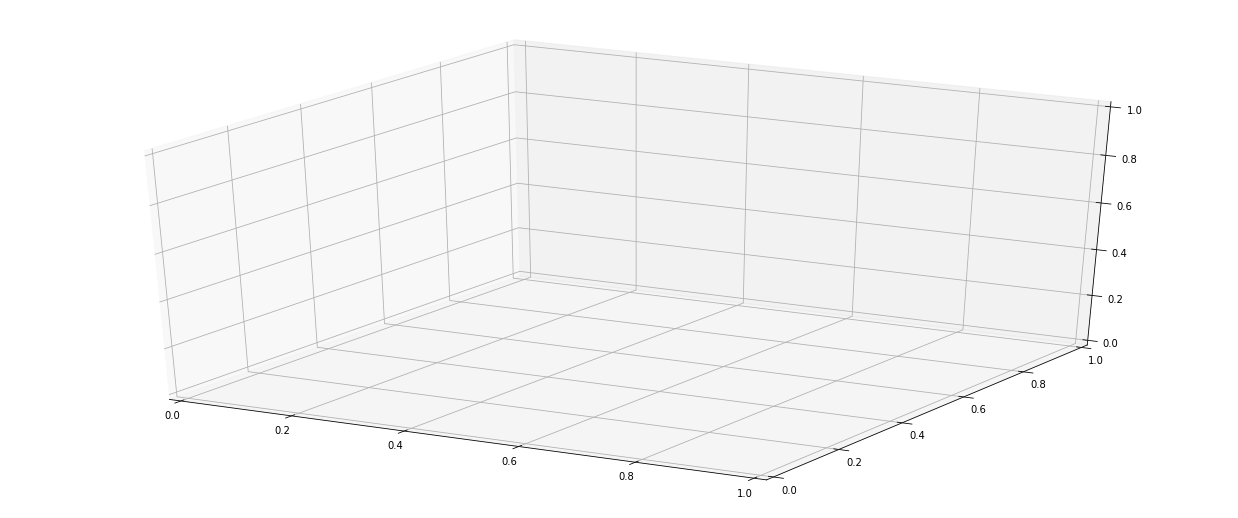

In [21]:
from mpl_toolkits.mplot3d import Axes3D

#plt.rcParams['figure.figsize'] = [17, 7]

fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 500, num=5), np.linspace(0, 60, num=5))

# calculamos los valores del plano para los puntos x e y
nuevoX = (model_rl_di_ho.coef_[0] * xx)
nuevoY = (model_rl_di_ho.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + model_rl_di_ho.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D que son reales
ax.scatter(x_train_di_ho['displacement'], x_train_di_ho['horsepower'], y_train, c='blue',s=30)

# Graficamos en rojo, los puntos que son predecidos por las variables independientes
ax.scatter(x_train_di_ho['displacement'], x_train_di_ho['horsepower'], model_rl_di_ho.predict(x_train_di_ho), c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=85)
        
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.set_title('Regresión Lineal con Múltiples Variables')



In [ ]:
#####################################################################################################
################################## Creación del modelo con 3 variables Independientes ###############
#####################################################################################################
####weight, acceleration, horsepower


#print(type(x_train_ori))
x_train_ori.describe()

x_train_we_ac_ho = x_train_ori[['weight','acceleration', 'horsepower']]
#x_train_we_ac_ho.describe()
model_rl_we_ac_ho = LinearRegression()
model_rl_we_ac_ho.fit(x_train_we_ac_ho, y_train)

imprimir_datos_modelo(model_rl_we_ac_ho, x_train_we_ac_ho, x_train_we_ac_ho, y_train)

w_0 45.678292876956434
[-0.005789402592259163, -0.002065657852236849, -0.04749561533211885]
R^2 (A) 0.7063754859981903
R^2 (B) 0.7063754859981903
Error cuadrático medio: 17.8414
Error absoluto medio 3.235720179777735
Mediana del error absoluto 2.5962018848364075
Error Cuadrático Medio = 4.223911640238705
              Coefficient
weight          -0.005789
acceleration    -0.002066
horsepower      -0.047496


In [ ]:
###################################################
########### Division de la data ###################
###################################################
from sklearn.model_selection import train_test_split

df_train_data, df_rest_data = train_test_split(df_auto, train_size=0.8, shuffle=False)

print("Dataframe: %s :: DataTrain: %s :: DataTest: %s" %(str(df_auto.shape), str(df_train_data.shape), str(df_rest_data.shape) ))

Dataframe: (392, 8) :: DataTrain: (313, 8) :: DataTest: (79, 8)


In [ ]:
print("====================x_train===============================")
x_80_train = df_train_data.iloc[:, :(len(df_train_data.columns)-1)]
print(x_80_train.shape)
x_80_train.info(verbose = False)
#print(x_80_train)

print("====================y_train===============================")
y_80_train = df_train_data.iloc[:,-1]
print(y_80_train.shape)
y_80_train.head()
print(y_80_train)

x_80_train_ori = x_80_train
x_80_train = x_80_train.values

y_80_train_ori = y_80_train
y_80_train = y_80_train.values

====================x_train===============================
(313, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Columns: 7 entries, cylinders to origin
dtypes: float64(4), int64(3)
memory usage: 19.6 KB
====================y_train===============================
(313,)
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
308    38.1
309    32.1
310    37.2
311    28.0
312    26.4
Name: mpg, Length: 313, dtype: float64


In [ ]:
model_80_rl = LinearRegression() 
model_80_rl.fit(x_80_train, y_80_train)  #x_train tiene mas de 1 variable y por eso es de multiple variables

imprimir_datos_modelo(model_80_rl, x_80_train_ori, x_80_train, y_80_train)

w_0 -1.5828103309052786
[-0.5194896120320369, 0.010213888287500143, -0.017766991643248083, -0.005572340609354387, -0.11267481204980456, 0.5820075106424497, 0.8480252377153485]
R^2 (A) 0.8211317823581514
R^2 (B) 0.8211317823581514
Error cuadrático medio: 8.0025
Error absoluto medio 2.14829768820156
Mediana del error absoluto 1.7611758661256722
Error Cuadrático Medio = 2.8288736547338877
              Coefficient
cylinders       -0.519490
displacement     0.010214
horsepower      -0.017767
weight          -0.005572
acceleration    -0.112675
model_year       0.582008
origin           0.848025


In [ ]:
print("====================x_test===============================")
x_20_test = df_rest_data.iloc[:, :(len(df_rest_data.columns)-1)]
print(x_20_test.shape)
x_20_test.info(verbose = False)
#print(x_20_test)

print("====================y_test===============================")
y_20_test = df_rest_data.iloc[:,-1]
print(y_20_test.shape)
y_20_test.head()
print(y_20_test)

x_20_test_ori = x_20_test
x_20_test = x_20_test.values

y_20_test_ori = y_20_test
y_20_test = y_20_test.values

====================x_test===============================
(79, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 313 to 391
Columns: 7 entries, cylinders to origin
dtypes: float64(4), int64(3)
memory usage: 4.9 KB
====================y_test===============================
(79,)
313    24.3
314    19.1
315    34.3
316    29.8
317    31.3
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 79, dtype: float64


In [ ]:
imprimir_datos_modelo(model_80_rl, x_20_test_ori, x_20_test, y_20_test)

w_0 -1.5828103309052786
[-0.5194896120320369, 0.010213888287500143, -0.017766991643248083, -0.005572340609354387, -0.11267481204980456, 0.5820075106424497, 0.8480252377153485]
R^2 (A) 0.24143714944967176
R^2 (B) 0.24143714944967176
Error cuadrático medio: 27.4627
Error absoluto medio 3.9253077012143907
Mediana del error absoluto 2.9991883973182603
Error Cuadrático Medio = 5.240489655782089
              Coefficient
cylinders       -0.519490
displacement     0.010214
horsepower      -0.017767
weight          -0.005572
acceleration    -0.112675
model_year       0.582008
origin           0.848025
